### Notebook Structure

This notebook examines the mean waveforms for the three batches to identify any remaining oscillatory patterns in the new results and how to filter them.

- **Extract Keys for Batch 1, Batch 2, and Batch 3**
- **Exploration of Batch 1**
- **Exploration of Batch 2**
- **Exploration of Batch 3**
- **Filtering Results Using Quality Metrics from the Pipeline**
    - **1. Batch 1 - Filtering and Comparison of Plots**
    - **2. Batch 2 - Filtering and Comparison of Plots**
    - **3. Batch 3 - Filtering Not Required**
- **Comparison Among Batches**

### Setup

In [1]:
import os

if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
from workflow.pipeline import *

[2024-07-18 21:21:49,265][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-07-18 21:21:50,910][INFO]: Connected milagros@db.datajoint.com:3306


### Extract Keys for Batch 1, Batch 2, and Batch 3

In [4]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O09"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O10"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O11"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O12"' & "paramset_idx=1").fetch("KEY")

batch1_keys = keys1 + keys2 + keys3 + keys4
batch1_keys = [
    key
    for key in batch1_keys
    if (key["end_time"] - key["start_time"]).total_seconds() / 60 == 5.0
]

In [5]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O13"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O14"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O15"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O16"' & "paramset_idx=1").fetch("KEY")

batch2_keys = keys1 + keys2 + keys3 + keys4
batch2_keys = [
    key
    for key in batch2_keys
    if (key["end_time"] - key["start_time"]).total_seconds() / 60 == 5.0
]

In [6]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O17"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O18"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O19"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O20"' & "paramset_idx=1").fetch("KEY")

batch3_keys = keys1 + keys2 + keys3 + keys4
batch3_keys = [
    key
    for key in batch3_keys
    if (key["end_time"] - key["start_time"]).total_seconds() / 60 == 5.0
]

### Exploration of Batch 1

In [7]:
# Fetching the peak waveforms
peak_wfs1 = (ephys.WaveformSet.PeakWaveform & batch1_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys1, start_times1, end_times1 = (
    ephys.EphysSessionInfo & batch1_keys
).fetch("session_info", "start_time", "end_time")
unique_sample_rates1 = {
    d["sample_rate"] for d in session_info_keys1 if "sample_rate" in d
}

# Calculate durations in seconds
durations1 = [
    (end_time - start_time).total_seconds()
    for start_time, end_time in zip(start_times1, end_times1)
]

# Assert that all durations are exactly 300 seconds
assert np.all(np.array(durations1) == 300.0)

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates1) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates1)}: {unique_sample_rates1}"
    )

sample_rate1 = unique_sample_rates1.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps1 = np.arange(len(peak_wfs1[0])) / sample_rate1  # ms

num_waveforms1 = len(peak_wfs1)

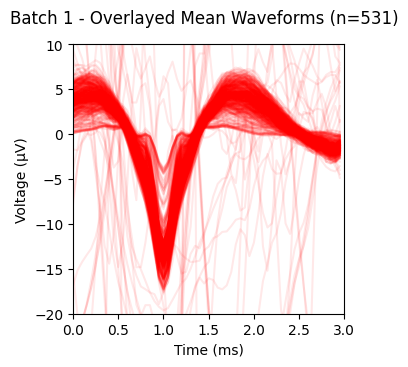

In [8]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs1:
    plt.plot(peak_wf_timestamps1, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 1 - Overlayed Mean Waveforms (n={num_waveforms1})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

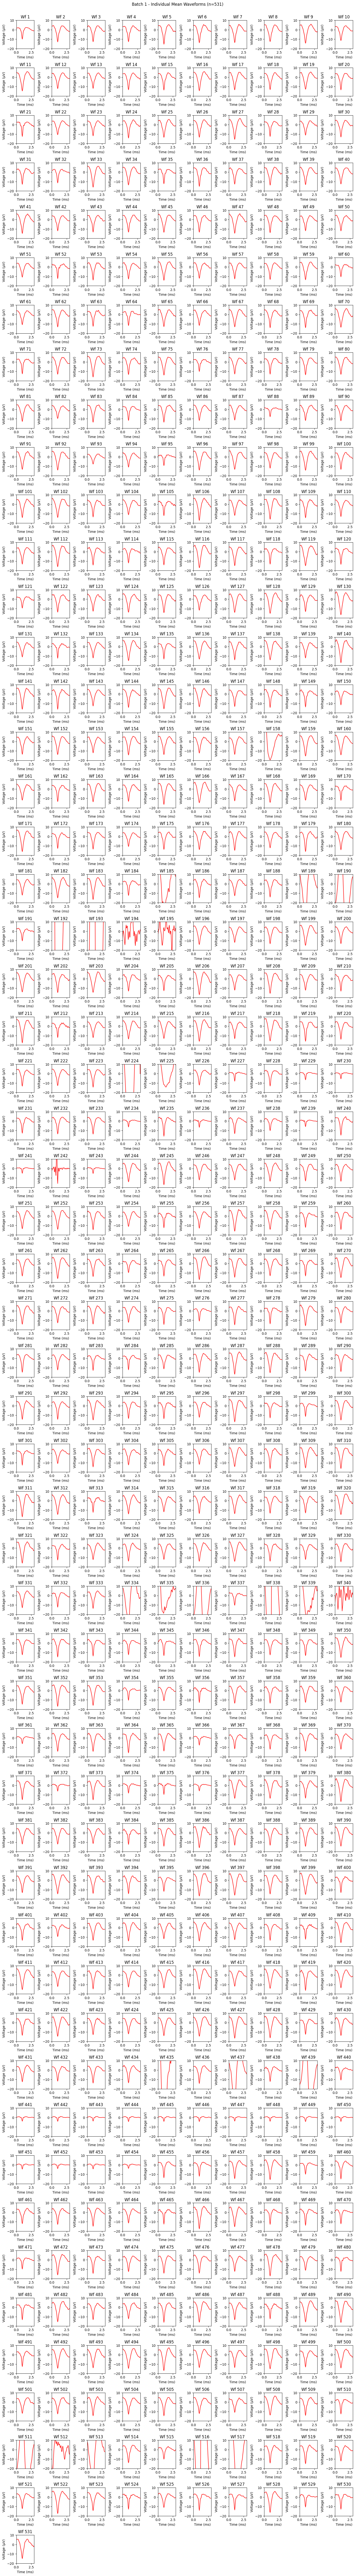

In [9]:
# Plotting
cols = 10
rows = int(np.ceil(num_waveforms1 / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < num_waveforms1:
        ax.plot(peak_wf_timestamps1, peak_wfs1[idx], color="red", alpha=0.9)
        ax.set_title(f"Wf {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
        ax.set_ylim(-20, 10)
    else:
        fig.delaxes(ax)

plt.suptitle(f"Batch 1 - Individual Mean Waveforms (n={num_waveforms1})", y=1.0005)
plt.tight_layout()
plt.show()

### Exploration of Batch 2

In [10]:
# Fetching the peak waveforms
peak_wfs2 = (ephys.WaveformSet.PeakWaveform & batch2_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys2, start_times2, end_times2 = (
    ephys.EphysSessionInfo & batch2_keys
).fetch("session_info", "start_time", "end_time")
unique_sample_rates2 = {
    d["sample_rate"] for d in session_info_keys2 if "sample_rate" in d
}

# Calculate durations in seconds
durations2 = [
    (end_time - start_time).total_seconds()
    for start_time, end_time in zip(start_times2, end_times2)
]

# Assert that all durations are exactly 300 seconds
assert np.all(np.array(durations2) == 300)

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates2) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates2)}: {unique_sample_rates2}"
    )

sample_rate2 = unique_sample_rates2.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps2 = np.arange(len(peak_wfs2[0])) / sample_rate2  # ms

num_waveforms2 = len(peak_wfs2)

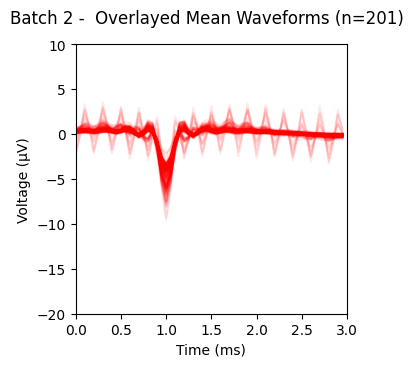

In [11]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs2:
    plt.plot(peak_wf_timestamps2, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 2 -  Overlayed Mean Waveforms (n={num_waveforms2})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

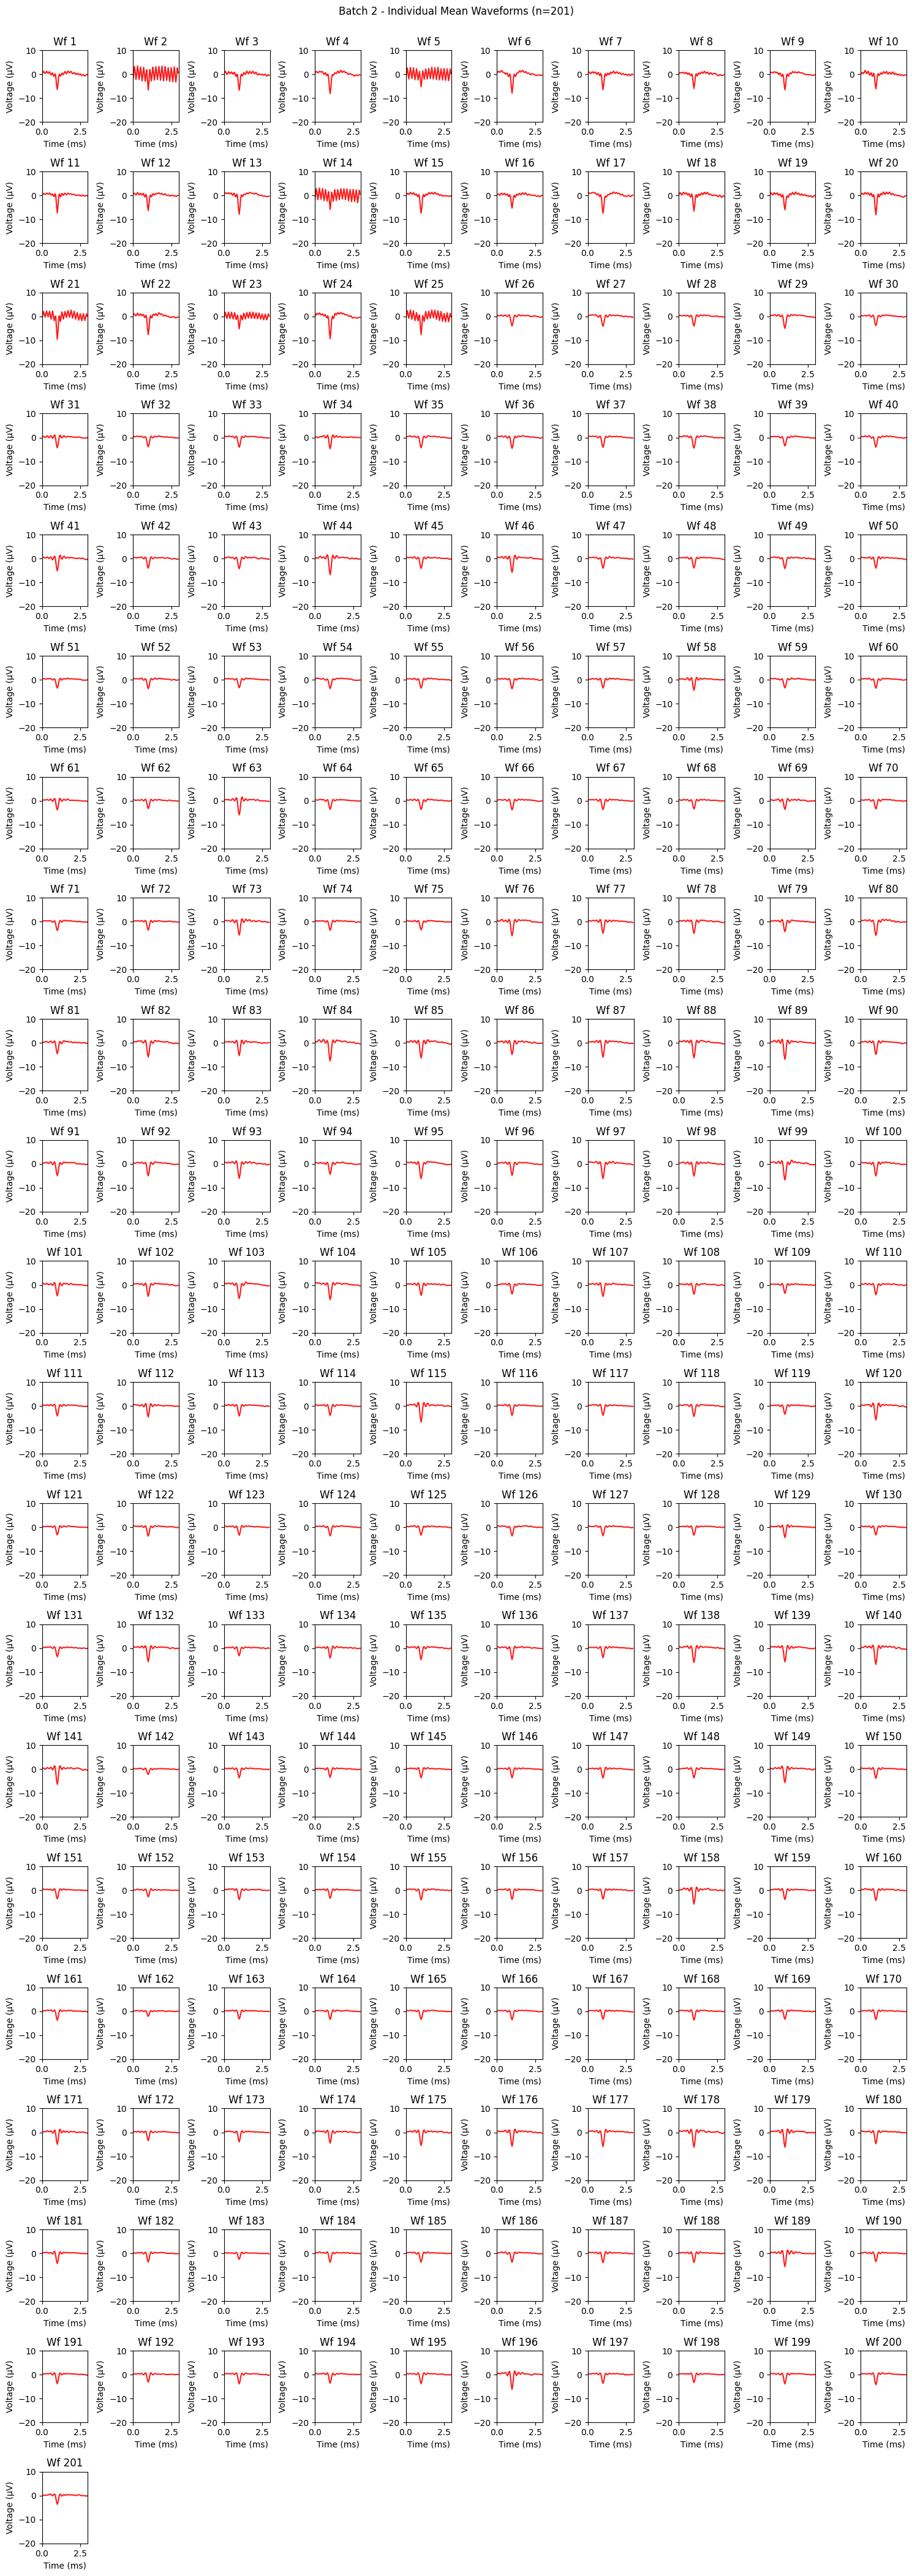

In [12]:
# Plotting
cols = 10
rows = int(np.ceil(num_waveforms2 / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < num_waveforms2:
        ax.plot(peak_wf_timestamps2, peak_wfs2[idx], color="red", alpha=0.9)
        ax.set_title(f"Wf {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
        ax.set_ylim(-20, 10)

    else:
        fig.delaxes(ax)

plt.suptitle(
    f"Batch 2 - Individual Mean Waveforms (n={num_waveforms2})",
    y=1.0005,
)
plt.tight_layout()
plt.show()

### Exploration of Batch3

In [13]:
# Fetching the peak waveforms
peak_wfs3 = (ephys.WaveformSet.PeakWaveform & batch3_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys3, start_times3, end_times3 = (
    ephys.EphysSessionInfo & batch3_keys
).fetch("session_info", "start_time", "end_time")
unique_sample_rates3 = {
    d["sample_rate"] for d in session_info_keys3 if "sample_rate" in d
}

# Calculate durations in seconds
durations3 = [
    (end_time - start_time).total_seconds()
    for start_time, end_time in zip(start_times3, end_times3)
]

# Assert that all durations are exactly 300 seconds
assert np.all(np.array(durations3) == 300)

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates3) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates3)}: {unique_sample_rates3}"
    )

sample_rate3 = unique_sample_rates3.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps3 = np.arange(len(peak_wfs3[0])) / sample_rate3  # ms

num_waveforms3 = len(peak_wfs3)

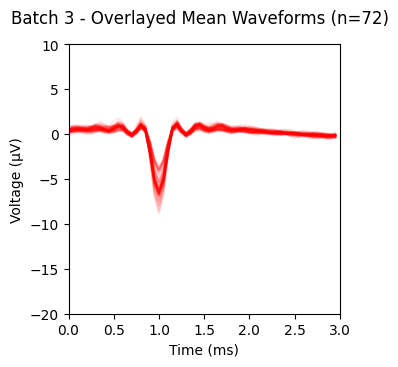

In [14]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs3:
    plt.plot(peak_wf_timestamps3, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 3 - Overlayed Mean Waveforms (n={num_waveforms3})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

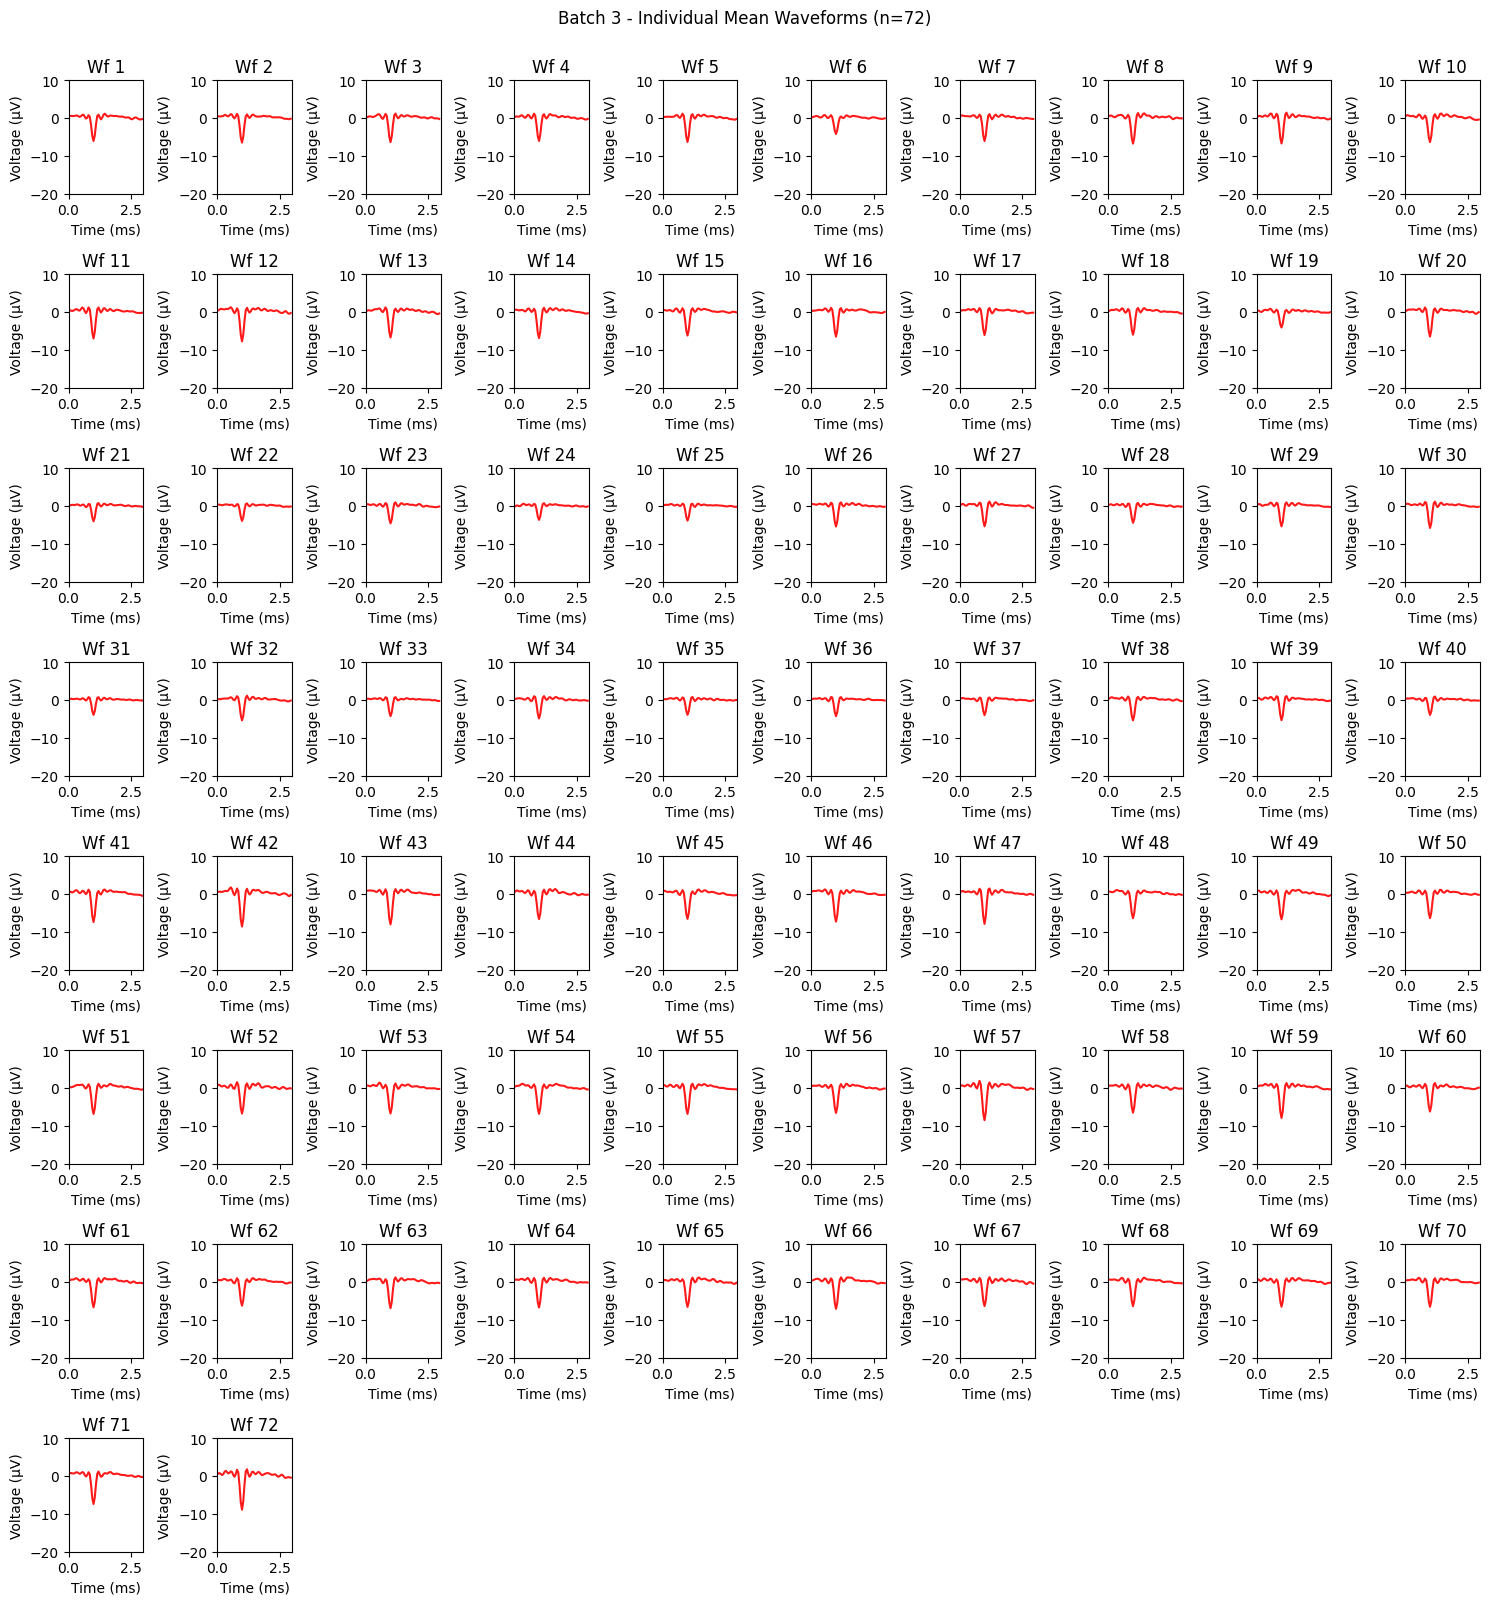

In [15]:
# Plotting
cols = 10
rows = int(np.ceil(num_waveforms3 / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < num_waveforms3:
        ax.plot(peak_wf_timestamps3, peak_wfs3[idx], color="red", alpha=0.9)
        ax.set_title(f"Wf {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
        ax.set_ylim(-20, 10)

    else:
        fig.delaxes(ax)

plt.suptitle(
    f"Batch 3 - Individual Mean Waveforms (n={num_waveforms3})",
    y=1.0005,
)
plt.tight_layout()
plt.show()

### Filtering Results Using Quality Metrics from the Pipeline

#### 1. Batch 1 - Filtering and Comparison of Plots

In [16]:
# Fetching the peak waveforms
peak_wfs1_filtered = (
    ephys.QualityMetrics.Waveform * ephys.WaveformSet.PeakWaveform
    & batch1_keys
    & "pt_ratio >(-0.3)"
    & "amplitude > (-20)"
).fetch("peak_electrode_waveform")

num_waveforms1_filtered = len(peak_wfs1_filtered)
num_waveforms1, num_waveforms1_filtered

(531, 139)

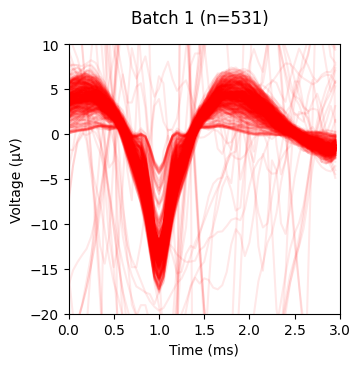

In [17]:
# plot waveforms BEFORE filtering
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs1:
    plt.plot(peak_wf_timestamps1, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 1 (n={num_waveforms1})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

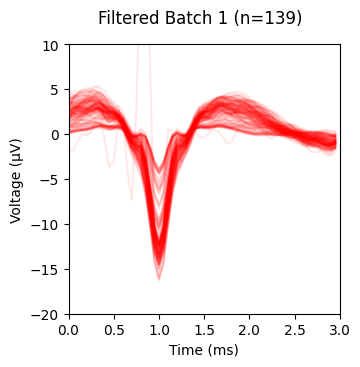

In [18]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs1_filtered:
    plt.plot(peak_wf_timestamps1, waveform, color="red", alpha=0.09)
plt.suptitle(f"Filtered Batch 1 (n={num_waveforms1_filtered})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

#### 2. Batch 2 - Filtering and Comparison of Plots

In [19]:
# Fetching the peak waveforms
peak_wfs2_filtered = (
    ephys.QualityMetrics.Waveform * ephys.WaveformSet.PeakWaveform
    & batch2_keys
    & "pt_ratio >(-0.2)"  # ratio between positive and negative peaks; absolute amplitude of the peak divided by the absolute amplitude of the trough relative to 0.
).fetch("peak_electrode_waveform")

num_waveforms2_filtered = len(peak_wfs2_filtered)
num_waveforms2, num_waveforms2_filtered

(201, 145)

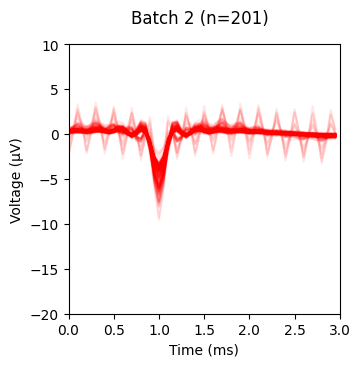

In [20]:
# plot waveforms BEFORE filtering
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs2:
    plt.plot(peak_wf_timestamps2, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 2 (n={num_waveforms2})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

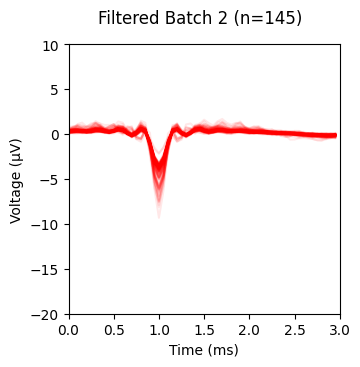

In [21]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs2_filtered:
    plt.plot(peak_wf_timestamps2, waveform, color="red", alpha=0.09)
plt.suptitle(f"Filtered Batch 2 (n={num_waveforms2_filtered})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

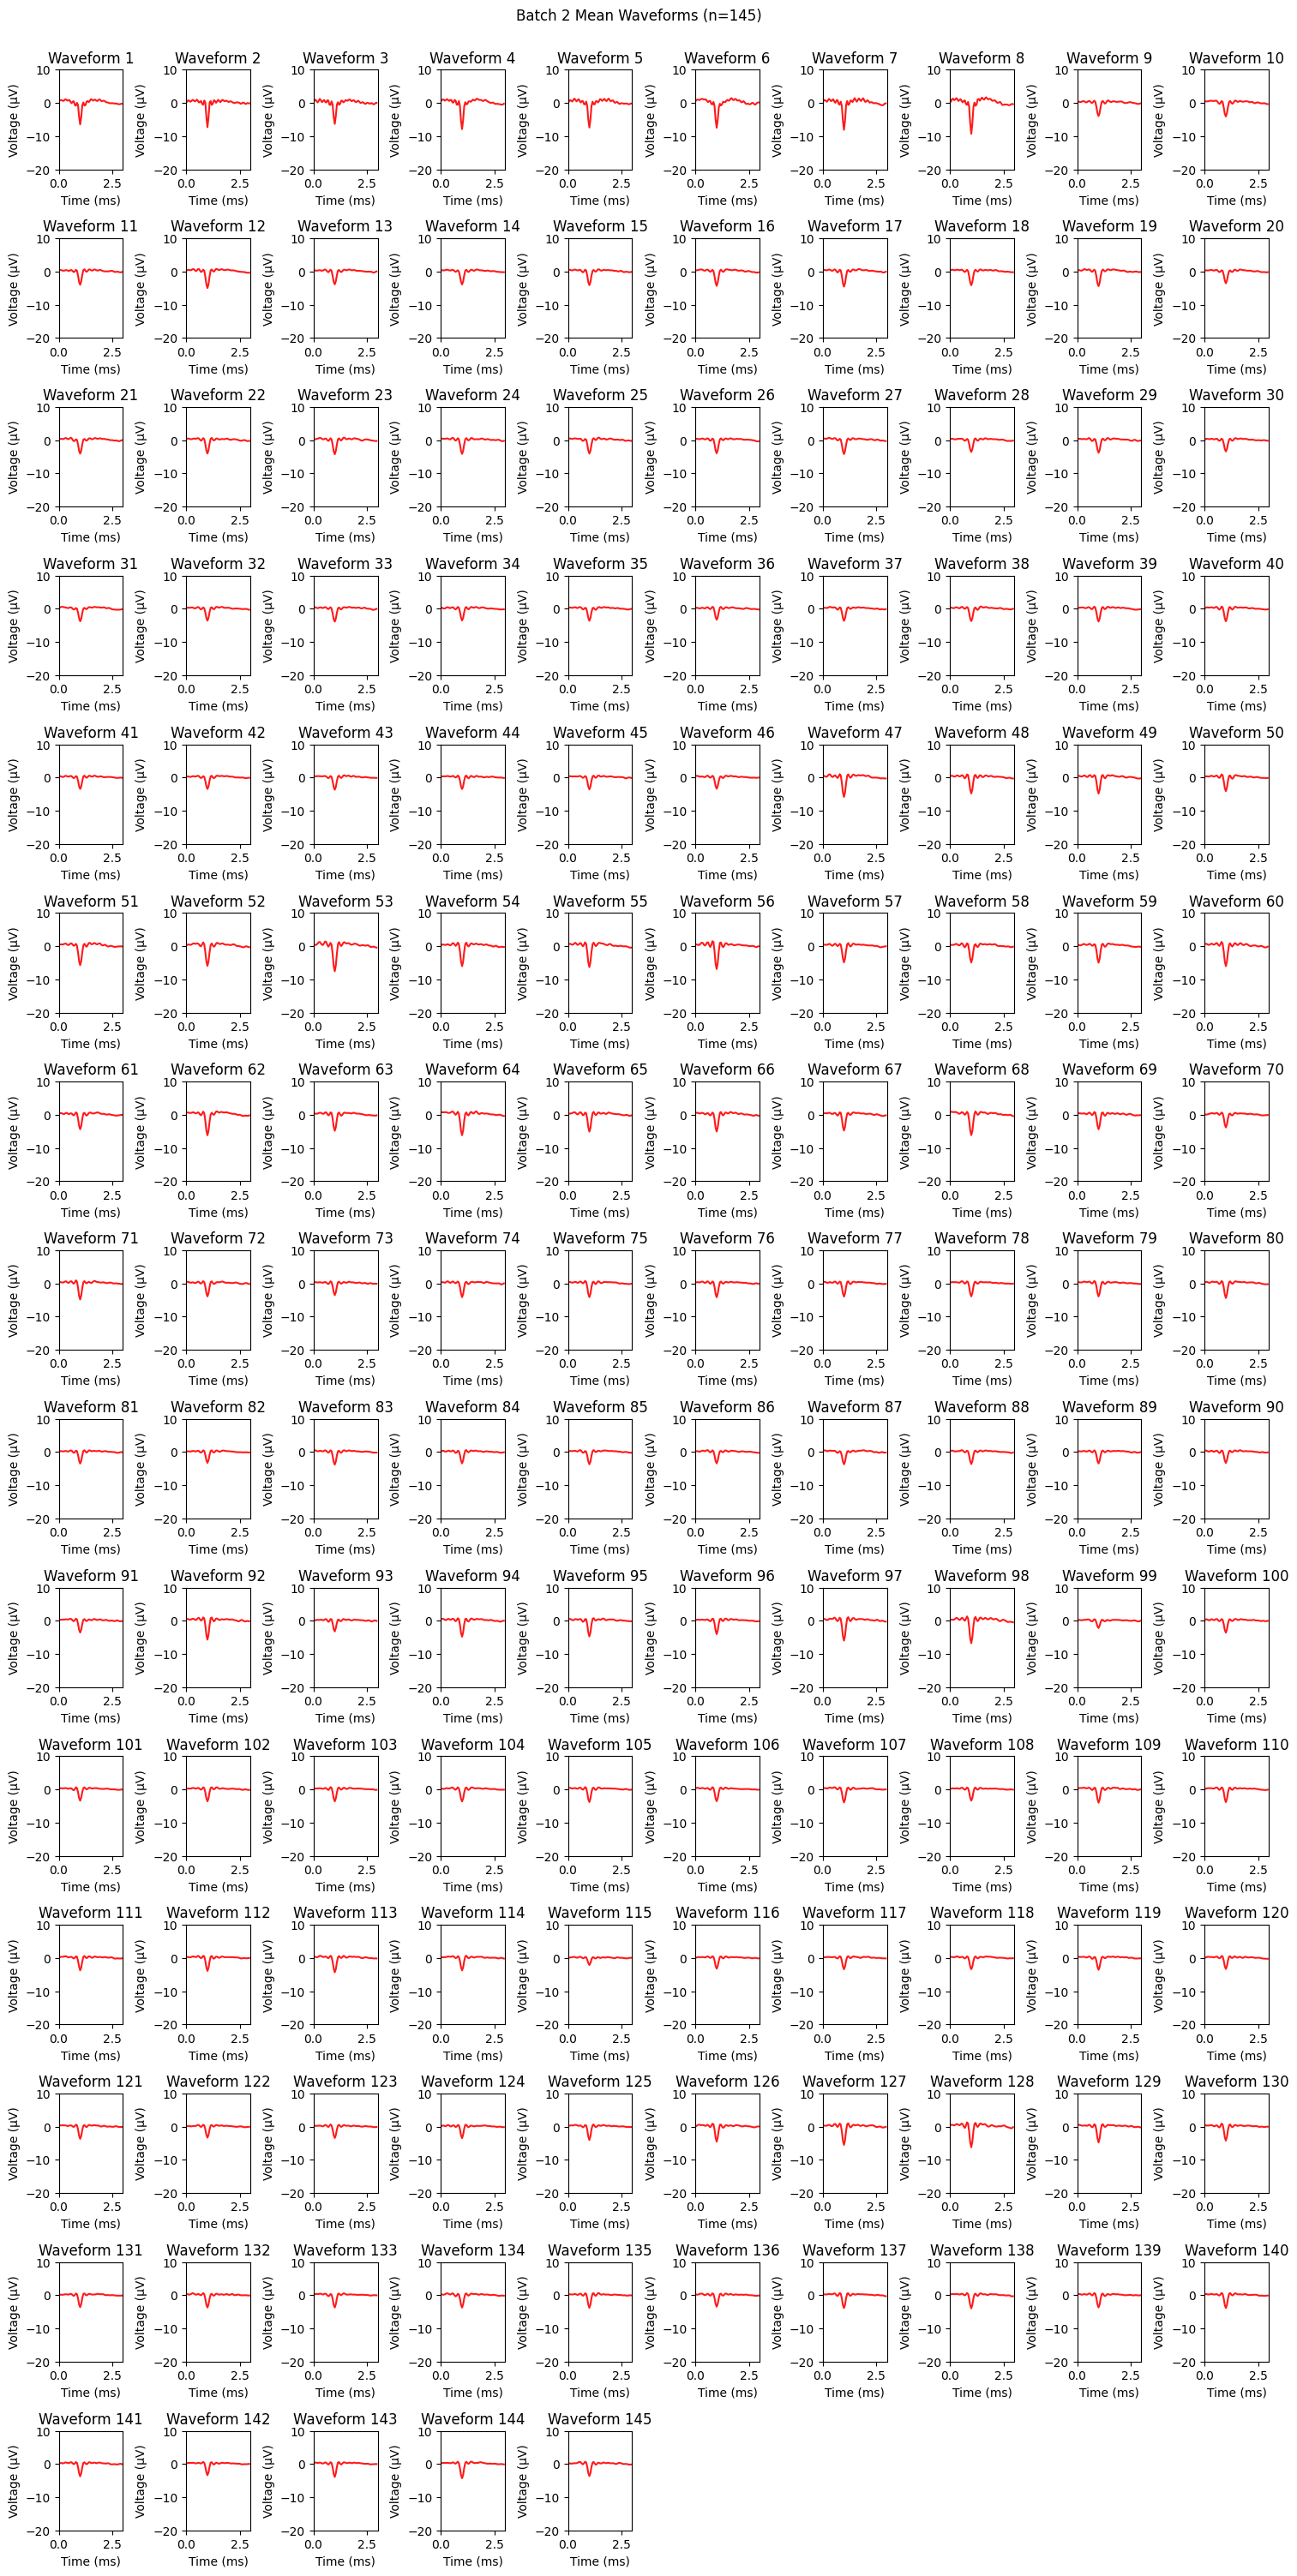

In [22]:
# Plotting
cols = 10
rows = int(np.ceil(num_waveforms2_filtered / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < num_waveforms2_filtered:
        ax.plot(peak_wf_timestamps2, peak_wfs2_filtered[idx], color="red", alpha=0.9)
        ax.set_title(f"Waveform {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
        ax.set_ylim(-20, 10)

    else:
        fig.delaxes(ax)

plt.suptitle(
    f"Batch 2 Mean Waveforms (n={num_waveforms2_filtered})",
    y=1.0005,
)
plt.tight_layout()
plt.show()

#### 3. Batch 3 - Filtering Not Required

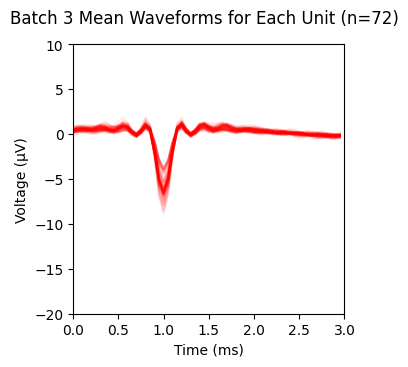

In [23]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for waveform in peak_wfs3:
    plt.plot(peak_wf_timestamps3, waveform, color="red", alpha=0.09)
plt.suptitle(f"Batch 3 Mean Waveforms for Each Unit (n={num_waveforms3})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

### Comparison Among Batches

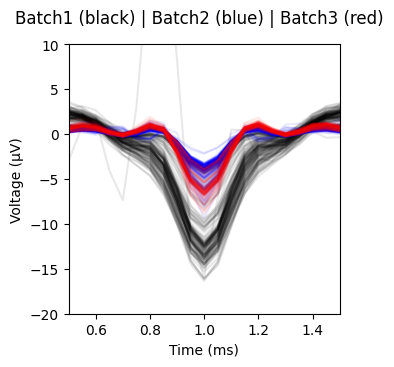

In [24]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(num_waveforms1_filtered):
    plt.plot(peak_wf_timestamps1, peak_wfs1_filtered[idx], color="black", alpha=0.09)
for idx in range(num_waveforms2_filtered):
    plt.plot(peak_wf_timestamps2, peak_wfs2_filtered[idx], color="blue", alpha=0.09)
for idx in range(num_waveforms3):
    plt.plot(peak_wf_timestamps3, peak_wfs3[idx], color="red", alpha=0.09)
plt.suptitle(f"Batch1 (black) | Batch2 (blue) | Batch3 (red)")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0.5, 1.5)
plt.ylim(-20, 10)
plt.show()